# SWMAL Exercise


## Gradient Descent Methods and Training


### Qa The Gradient Descent Method (GD)

Eta is the learning rate. The learning rate controls the step size that the algorithm takes during each iteration of gradient descent. It is a hyperparameter that you can adjust to control the convergence speed and stability of the algorithm. In order to find a good learning rate one can use grid search with a limit on the number of epochs in order to eliminate models that take too long to converge. In the formula below eta is the "n" symbol

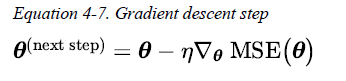

The formula above is implemented below, where the n_iterations is the number of epochs. The gradient descent algorithm will in this example run for 1000 epochs. During each epoch, the algorithm updates the model's parameters (theta) based on the gradient of the cost function. 

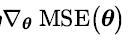

This part of the formula is implemented as the gradients in the code snippet below. And lastly the resulting theta is calculated as each theta from the loop where the eta * gradients is subtracted from the theta of that iteration.  

If the eta is too low the gradient decent method will never convey close enough towards the solution and if the eta is too high it will overshoot and convey away from the actual solution. 

stochastic gradient descent theta=[4.20831857 2.79226572]


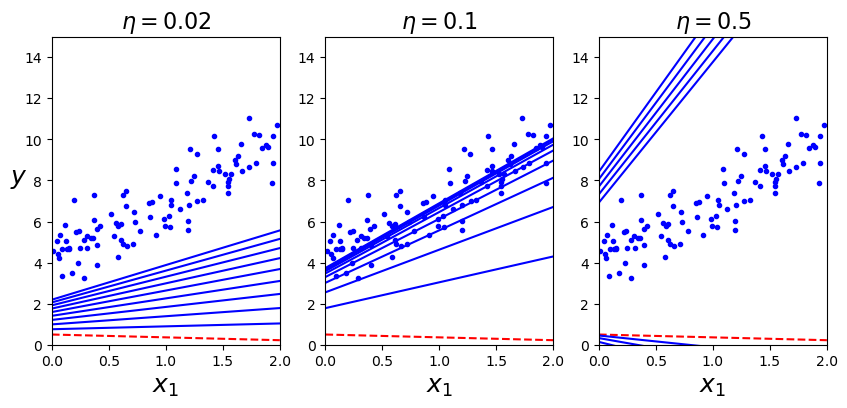

OK


In [6]:
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

### Qb The Stochastic Gradient Descent Method (SGD)

Stochastic Gradient Descent (SGD) is a variation of the gradient descent algorithm. While the basic gradient descent updates the model parameters using the average of gradients over the entire training dataset in each epoch, SGD updates the parameters using a single random training instance (or a small random batch) at a time.

Explanation of np.random.randint():
The random_index selects a random data point from the dataset X_b and y. This stochastic sampling of data points introduces randomness into the updates, which can help the algorithm escape local minima.

We don't divide the gradients by m as we did in the basic gradient descent code. In basic gradient descent, we calculate the average gradient over the entire dataset, so we have to divide by m. 
In contrast, SGD uses a single data point at each iteration, so theres no need to divide by m. 

Furthermore the learning rate in the SGD is calculated using the learning schedule and varies through each iteration. This means that as the algorithm progresses, the learning rate decreases, which helps it converge smoothly and handle irregularities in the cost function.

To sum up these differences make SGD more suitable for large datasets and can help it converge faster, although it introduces more variability in the updates due to the random sampling.

stochastic gradient descent theta=[4.24042206 2.81339809]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[4.16599768], sgd_reg.coef_=[2.76090213]


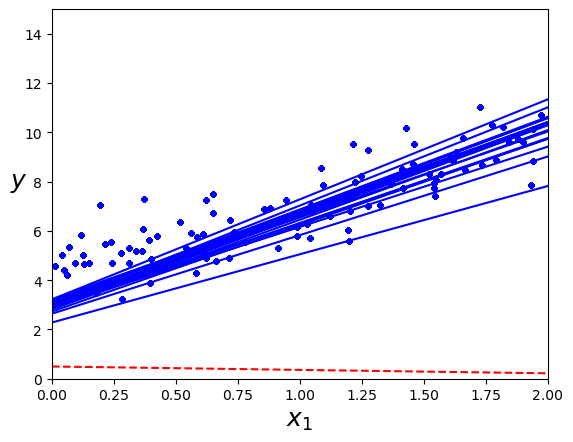

OK


In [12]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

### Qc Adaptive learning rate for $\eta$  

The learning_schedule() function is a way to introduce adaptability into the learning rate during training. It can help the stochastic gradient descent algorithm converge more effectively, handle different data patterns, and avoid convergence issues associated with using a fixed learning rate. Different learning rate schedules and their parameters should be chosen based on empirical evaluation and experimentation for a given machine learning problem.

### Qd Mini-batch Gradient Descent Method 

__Mini-batch__ SG method, and how it differs from the two others.

A mini-batch stochastic gradient descent (SGD) method is a variation of the gradient descent algorithm. It differs from the batch gradient descent and stochastic gradient descent (SGD), in how it processes and updates the model parameters during training. 
Mini-Batch SGD is a compromise between the computational efficiency of SGD and the stability of BGD. 
It divides the training data into smaller batches, which provides a balance between noise reduction and convergence speed. The choice of the mini-batch size is a hyperparameter that can impact training efficiency and convergence behavior.

__Algorithm details__ and __main differences__ compared with the GD and SGD.

In Mini-Batch SGD, the dataset is divided into mini-batches, each containing a small subset of data points. This is specified by the minibatch_size variable, which is set to 20 in your code.
The algorithm processes and updates the model parameters using one mini-batch at a time. This is different from BGD, where the entire dataset is used in each iteration, and it's different from SGD, which uses one random data point at a time. 

Similar to SGD, Mini-Batch SGD employs a learning schedule to adapt the learning rate during training. The learning_schedule() function is defined to calculate the learning rate based on the iteration number. This allows the learning rate to decrease as training progresses, which is helpful for convergence.
In BGD, you can use a fixed learning rate throughout training, as it processes the entire dataset in each iteration.

Mini-Batch SGD combines the advantages of BGD and SGD. It utilizes parallelization through mini-batches, introduces randomness through data shuffling, and adapts the learning rate with a schedule. This approach offers faster convergence than BGD while being more stable than pure SGD. The choice of the mini-batch size, learning schedule hyperparameters (e.g., t0 and t1), and other settings can be adjusted based on the problem and dataset to achieve optimal training performance.

In [8]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')

mini-batch theta=[4.23219116 2.82565088]
OK


### Qe Choosing a Gradient Descent Method

From the plot we can see that the BGD method is clearly the most smooth, but the Mini-batch SGD is actully also very close and converges quikly but with some noise. However it is more efficient than BGD. The SGD is the one that converges the slowest and also contain a lot of noise. It makes sense given that only one data point is evaluate compared to the two otters 🦦 where Mini-batch SGD has more but not all like with BGD.

__Gradient Descent (BGD)__

* Advantages:

    - Precise convergence to the global minimum.
    
    - Stable and smooth updates due to the use of the entire dataset.


* Disadvantages:

    - Computationally expensive for large datasets.

    - Memory-intensive when the dataset is large.

__Stochastic Gradient Descent (SGD)__

* Advantages:

    - Computationally efficient; processes one data point at a time.
    
    - Can escape local minima due to noisy updates.


* Disadvantages:

    - Noisy updates can lead to oscillations and slower convergence.

    - Less precise gradient estimates compared to BGD.

__Mini-Batch Stochastic Gradient Descent (Mini-Batch SGD)__

* Advantages:

    - Combines the efficiency of parallel processing with reduced noise compared to pure SGD.
    
    - Faster convergence than BGD on large datasets.


* Disadvantages:

    - The choice of the mini-batch size is a hyperparameter that requires tuning.
    
    - May still require significant memory for very large datasets.

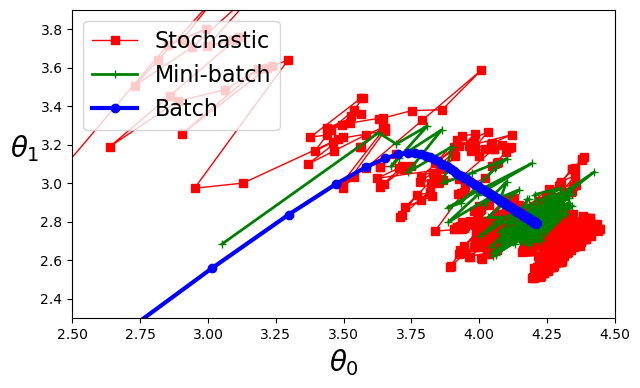

OK


In [13]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')